In [18]:
from tsfresh.examples import load_driftbif
from tsfresh.feature_extraction import EfficientFCParameters, extract_features
# from tsfresh.feature_extraction.settings import get_combiner_functions, get_simple_functions
import pandas as pd
import pprint
import timeit
from tqdm import tqdm
import matplotlib.pylab as plt
import seaborn as sns

In [37]:
# load data
X, _ = load_driftbif(10, 10000)
X.drop("dimension", axis=1, inplace=True)
X.head()

,id,time,value
0,0,0.00,0.000000
1,0,0.05,0.000118
2,0,0.10,0.000184
3,0,0.15,0.000309
4,0,0.20,0.000373


In [78]:
# get all the parameters and respective functions
settings = EfficientFCParameters()
del settings['number_cwt_peaks']
del settings['augmented_dickey_fuller']
del settings['change_quantiles']
del settings['fft_coefficient']
del settings['max_langevin_fixed_point']
del settings['cwt_coefficients']
extract_features(timeseries_container=X, 
                 column_id="id",
                 n_jobs=0, 
                 default_fc_parameters=settings)



Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]

Feature Extraction:   5%|▌         | 1/20 [00:00<00:14,  1.32it/s]

Feature Extraction:  10%|█         | 2/20 [00:01<00:13,  1.30it/s]

Feature Extraction:  15%|█▌        | 3/20 [00:02<00:13,  1.28it/s]

Feature Extraction:  20%|██        | 4/20 [00:03<00:12,  1.28it/s]

Feature Extraction:  25%|██▌       | 5/20 [00:04<00:12,  1.23it/s]

Feature Extraction:  30%|███       | 6/20 [00:04<00:11,  1.25it/s]

Feature Extraction:  35%|███▌      | 7/20 [00:05<00:10,  1.27it/s]

Feature Extraction:  40%|████      | 8/20 [00:06<00:09,  1.28it/s]

Feature Extraction:  45%|████▌     | 9/20 [00:07<00:08,  1.29it/s]

Feature Extraction:  50%|█████     | 10/20 [00:07<00:08,  1.24it/s]

Feature Extraction:  55%|█████▌    | 11/20 [00:08<00:07,  1.26it/s]

Feature Extraction:  60%|██████    | 12/20 [00:09<00:06,  1.28it/s]

Feature Extraction:  65%|██████▌   | 13/20 [00:10<00:05,  1.29it/s]

Feature Extraction:  70%|███████   | 14/20 [00:10<

variable,time__abs_energy,time__absolute_sum_of_changes,"time__agg_autocorrelation__f_agg_""mean""__maxlag_40","time__agg_autocorrelation__f_agg_""median""__maxlag_40","time__agg_autocorrelation__f_agg_""var""__maxlag_40","time__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","time__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","time__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","time__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","time__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,value__symmetry_looking__r_0.9,value__symmetry_looking__r_0.9500000000000001,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__value_count__value_-1,value__value_count__value_0,value__value_count__value_1,value__variance,value__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,1.666417e+09,1499.85,0.991806,0.991804,0.000021,125.262594,0.5,0.125,0.004844,126.514838,...,1.0,1.0,4.934644e-13,9.059394e-13,1.114384e-12,0.0,2.0,0.0,0.000001,0.0
1,1.666417e+09,1499.85,0.991806,0.991804,0.000021,125.262594,0.5,0.125,0.004844,126.514838,...,1.0,1.0,3.732254e-13,6.789234e-13,8.185014e-13,0.0,2.0,0.0,0.000001,0.0
2,1.666417e+09,1499.85,0.991806,0.991804,0.000021,125.262594,0.5,0.125,0.004844,126.514838,...,1.0,1.0,9.572999e-13,1.788985e-12,2.290809e-12,0.0,2.0,0.0,0.000002,0.0
3,1.666417e+09,1499.85,0.991806,0.991804,0.000021,125.262594,0.5,0.125,0.004844,126.514838,...,1.0,1.0,6.028762e-13,1.113325e-12,1.387527e-12,0.0,2.0,0.0,0.000002,0.0
4,1.666417e+09,1499.85,0.991806,0.991804,0.000021,125.262594,0.5,0.125,0.004844,126.514838,...,1.0,1.0,5.503598e-13,1.013697e-12,1.256013e-12,0.0,2.0,0.0,0.000002,0.0
5,1.666417e+09,1499.85,0.991806,0.991804,0.000021,125.262594,0.5,0.125,0.004844,126.514838,...,1.0,1.0,3.450426e-13,6.258798e-13,7.499510e-13,0.0,2.0,0.0,0.000001,0.0
6,1.666417e+09,1499.85,0.991806,0.991804,0.000021,125.262594,0.5,0.125,0.004844,126.514838,...,1.0,1.0,4.665035e-13,8.549467e-13,1.047608e-12,0.0,2.0,0.0,0.000001,0.0
7,1.666417e+09,1499.85,0.991806,0.991804,0.000021,125.262594,0.5,0.125,0.004844,126.514838,...,1.0,1.0,4.445073e-13,8.133799e-13,9.933023e-13,0.0,2.0,0.0,0.000001,0.0
8,1.666417e+09,1499.85,0.991806,0.991804,0.000021,125.262594,0.5,0.125,0.004844,126.514838,...,1.0,1.0,4.955032e-13,9.097975e-13,1.119443e-12,0.0,2.0,0.0,0.000001,0.0


In [65]:
# compare performance of tsfresh for simple feature calculator that are calculated individually
res  = pd.DataFrame()
n_ts = 20
l_ts = 1000
n_ti = 3

for f, param in tqdm(settings.items()):
    res.loc[f, "feature"] = f
    res.loc[f, "n_samp"] = n_ts
    res.loc[f, "length"] = l_ts
    
    fc_dict = {f:param}
    
    t = timeit.timeit(lambda : extract_features(timeseries_container=X, 
                                                column_id="id",
                                                n_jobs=0, 
                                                default_fc_parameters=fc_dict, 
                                                disable_progressbar=True), 
                      number=1)
    n_fs = len(param) if param is not None else 1
    res.loc[f, "n_fs"] = n_fs
    res.loc[f, "t_abs"] = t * 1.0/n_fs
    res.loc[f, "t_1ts"] = t*1.0/(n_ts*n_fs)



  0%|          | 0/55 [00:00<?, ?it/s]

  2%|▏         | 1/55 [00:00<00:16,  3.37it/s]

  4%|▎         | 2/55 [00:00<00:14,  3.53it/s]

  5%|▌         | 3/55 [00:00<00:14,  3.64it/s]

  7%|▋         | 4/55 [00:01<00:13,  3.66it/s]

  9%|▉         | 5/55 [00:01<00:16,  3.06it/s]

 11%|█         | 6/55 [00:01<00:15,  3.20it/s]

 13%|█▎        | 7/55 [00:02<00:14,  3.36it/s]

 15%|█▍        | 8/55 [00:02<00:14,  3.32it/s]

 16%|█▋        | 9/55 [00:02<00:13,  3.41it/s]

 18%|█▊        | 10/55 [00:03<00:15,  2.92it/s]

 20%|██        | 11/55 [00:03<00:16,  2.66it/s]

 22%|██▏       | 12/55 [00:03<00:14,  2.98it/s]

 24%|██▎       | 13/55 [00:04<00:13,  3.09it/s]

 25%|██▌       | 14/55 [00:04<00:13,  2.99it/s]

 27%|██▋       | 15/55 [00:04<00:12,  3.21it/s]

 29%|██▉       | 16/55 [00:04<00:11,  3.39it/s]

 31%|███       | 17/55 [00:05<00:10,  3.50it/s]

 33%|███▎      | 18/55 [00:05<00:10,  3.52it/s]

 35%|███▍      | 19/55 [00:05<00:10,  3.50it/s]

 36%|███▋      | 20/55 [00:06<00:09,

In [66]:
res

,feature,n_samp,length,n_fs,t_abs,t_1ts
variance_larger_than_standard_deviation,variance_larger_than_standard_deviation,20.0,1000.0,1.0,0.288502,0.014425
has_duplicate_max,has_duplicate_max,20.0,1000.0,1.0,0.247067,0.012353
has_duplicate_min,has_duplicate_min,20.0,1000.0,1.0,0.250376,0.012519
has_duplicate,has_duplicate,20.0,1000.0,1.0,0.265755,0.013288
sum_values,sum_values,20.0,1000.0,1.0,0.446887,0.022344
abs_energy,abs_energy,20.0,1000.0,1.0,0.276616,0.013831
mean_abs_change,mean_abs_change,20.0,1000.0,1.0,0.258331,0.012917
mean_change,mean_change,20.0,1000.0,1.0,0.304897,0.015245
mean_second_derivative_central,mean_second_derivative_central,20.0,1000.0,1.0,0.272601,0.013630
median,median,20.0,1000.0,1.0,0.453434,0.022672


In [67]:
res["feature"] = res.feature.astype(str)
res = res.sort_values(by="feature")

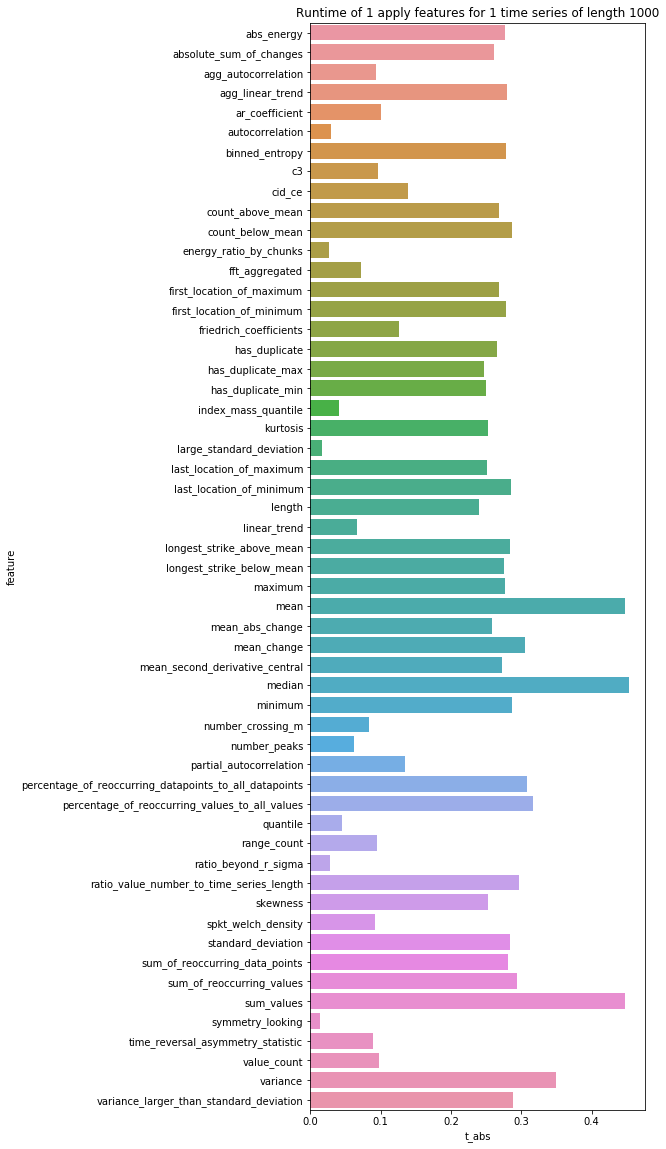

In [68]:
plt.figure(figsize=(6, 20))
sns.barplot(y="feature", x="t_abs", data=res)
plt.title("Runtime of 1 apply features for 1 time series of length 1000")
plt.show()

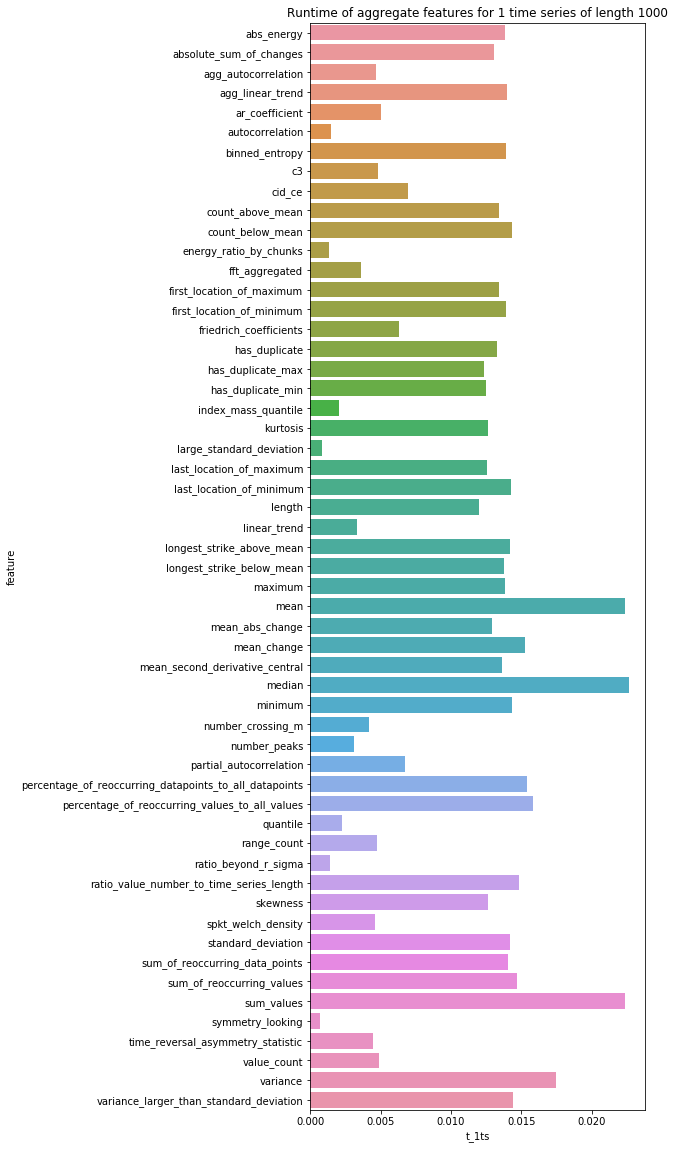

In [69]:
plt.figure(figsize=(6,20))
sns.barplot(y="feature", x="t_1ts", data=res)
plt.title("Runtime of aggregate features for 1 time series of length 1000")
plt.show()

sample_entropy and approximate_entropy make up for most of the runtime, we create the following plots without them

In [70]:
plt.figure(figsize=(6,20))
sns.barplot(y="feature", x="t_1ts", data=res.drop(["sample_entropy", "approximate_entropy"]))
plt.title("Runtime of aggregate features for 1 time series of length 1000")
plt.show()

KeyError: "['sample_entropy' 'approximate_entropy'] not found in axis"

<Figure size 432x1440 with 0 Axes>

In [71]:
# we calculate how much many features cause 90% of the runtime 
r = res.t_1ts.copy()
r.sort_values(ascending=True, inplace=True)
r

symmetry_looking                                          0.000699
large_standard_deviation                                  0.000828
energy_ratio_by_chunks                                    0.001316
ratio_beyond_r_sigma                                      0.001396
autocorrelation                                           0.001459
index_mass_quantile                                       0.002074
quantile                                                  0.002239
number_peaks                                              0.003119
linear_trend                                              0.003339
fft_aggregated                                            0.003625
number_crossing_m                                         0.004182
time_reversal_asymmetry_statistic                         0.004445
spkt_welch_density                                        0.004580
agg_autocorrelation                                       0.004672
range_count                                               0.00

In [72]:
# in percentage
r / r.sum()*100

symmetry_looking                                          0.121371
large_standard_deviation                                  0.143865
energy_ratio_by_chunks                                    0.228617
ratio_beyond_r_sigma                                      0.242500
autocorrelation                                           0.253479
index_mass_quantile                                       0.360332
quantile                                                  0.389019
number_peaks                                              0.541790
linear_trend                                              0.580007
fft_aggregated                                            0.629795
number_crossing_m                                         0.726420
time_reversal_asymmetry_statistic                         0.772180
spkt_welch_density                                        0.795563
agg_autocorrelation                                       0.811632
range_count                                               0.82